Predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, power_transform, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import RidgeClassifierCV
from scipy.stats import zscore

In [2]:
df_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


First let us train the train dataset

EDA

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


there are mixture of categorical and numeric column

let us see the unique values of each categorical column by loop

In [4]:
for i in df_train.columns:
    if df_train[i].dtypes=='object':
        print(df_train[i].unique())

['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
['married' 'divorced' 'single']
['unknown' 'secondary' 'tertiary' 'primary']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['telephone' 'cellular' 'unknown']
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
['unknown' 'success' 'failure' 'other']
['no' 'yes']


In [5]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [6]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: xlabel='age', ylabel='Count'>

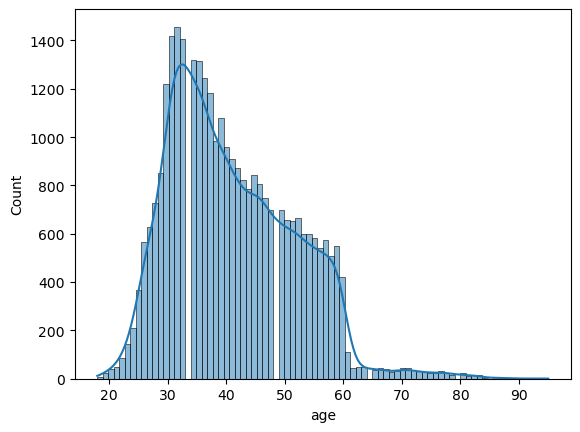

In [7]:
#lets see the age plot of clients
sns.histplot(x=df_train['age'],kde=True)

there are many people of age 30 to 40 years. the age data is right skewed

<Axes: xlabel='count', ylabel='job'>

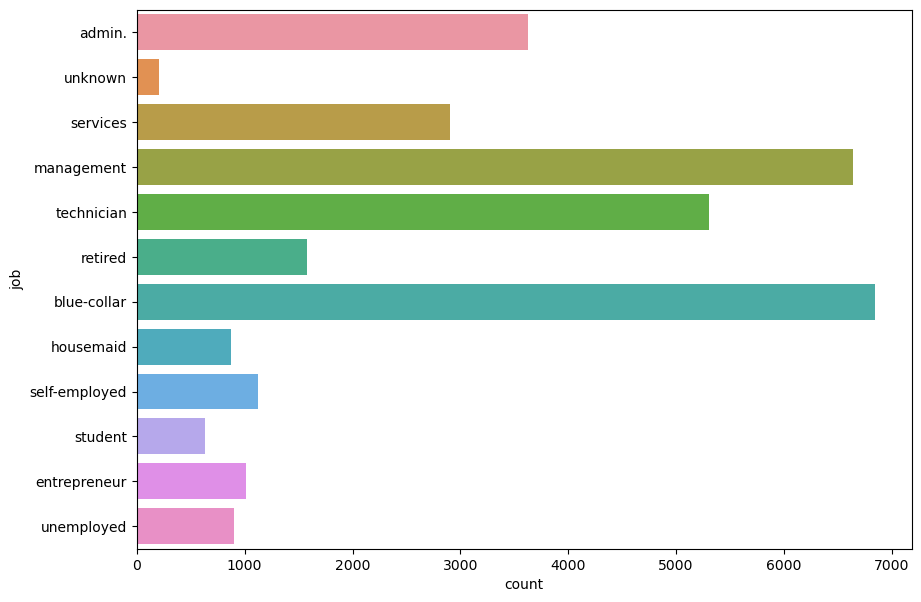

In [8]:
#Type of Job the client has
plt.figure(figsize=(10,7))
sns.countplot(y=df_train['job'])

here we can see highest job is blue collar and management. Lowest job is unknown, student and unemployment

<Axes: xlabel='marital', ylabel='count'>

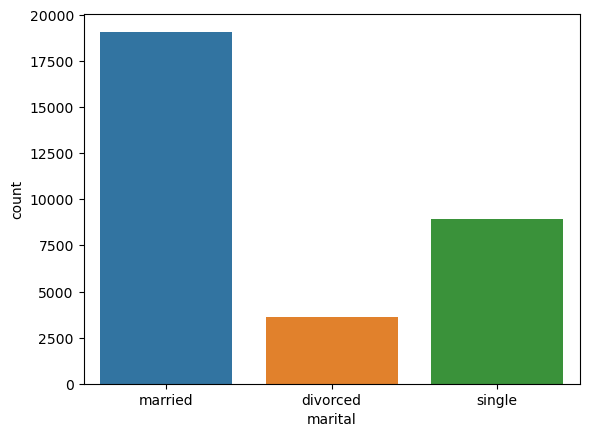

In [9]:
#Marital status of the client
sns.countplot(x=df_train['marital'])

so there are more married people who have subscribed term deposit

<Axes: xlabel='education', ylabel='count'>

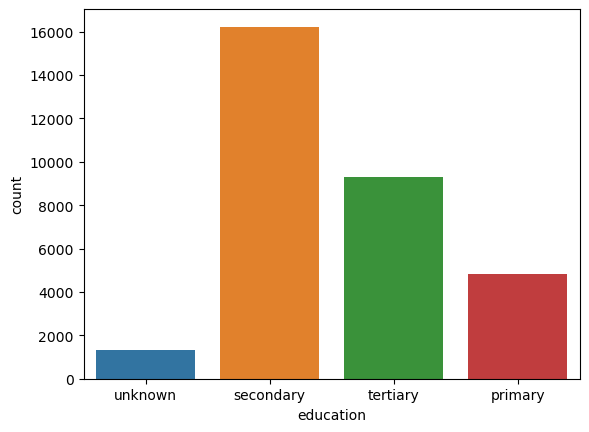

In [10]:
#Count plot for education column
sns.countplot(x=df_train['education'])

there are more client who's education is secondary level

<Axes: ylabel='default'>

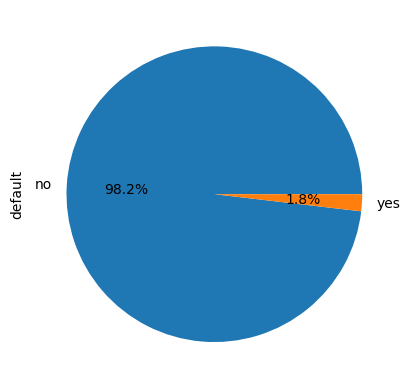

In [11]:
#Credit in default
#sns.countplot(x=df_train['default'])
df_train['default'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='housing', ylabel='count'>

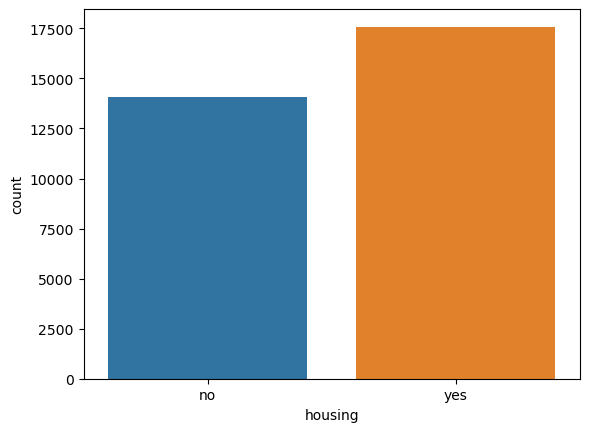

In [12]:
#Client who has housing loan
sns.countplot(x=df_train['housing'])

<Axes: xlabel='loan', ylabel='count'>

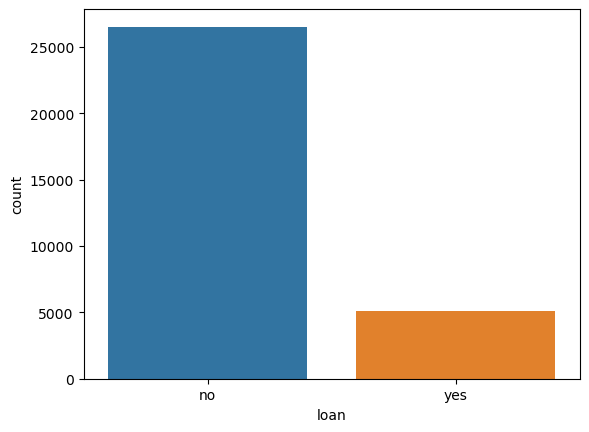

In [13]:
#client who has personal loan 
sns.countplot(x=df_train['loan'])

<Axes: xlabel='contact', ylabel='count'>

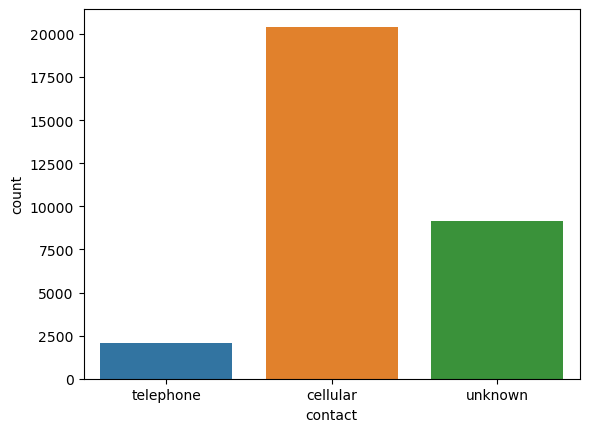

In [14]:
#Clients contact way
sns.countplot(x=df_train['contact'])

<Axes: xlabel='month', ylabel='count'>

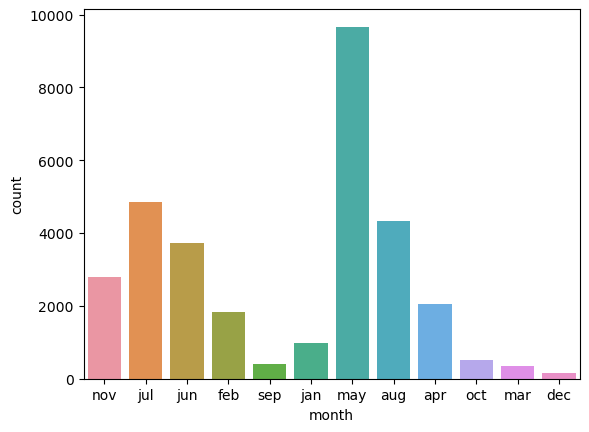

In [15]:
#Clients called in each month
sns.countplot(x=df_train['month'])

we can see many clients have called in May

<Axes: xlabel='poutcome', ylabel='count'>

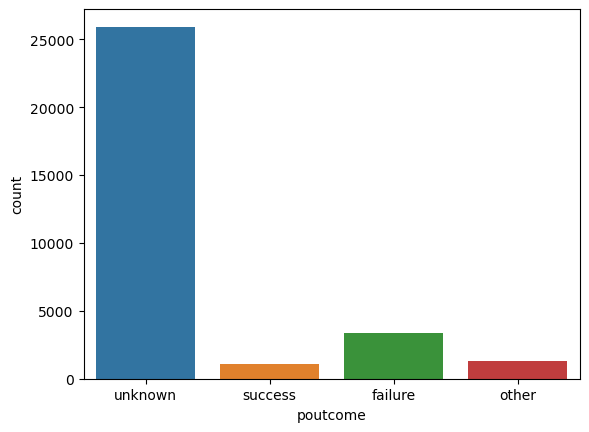

In [16]:
#Outcome of previous marketing campain 
sns.countplot(x=df_train['poutcome'])

we can see the success rate is less compared to others

<Axes: xlabel='subscribed', ylabel='count'>

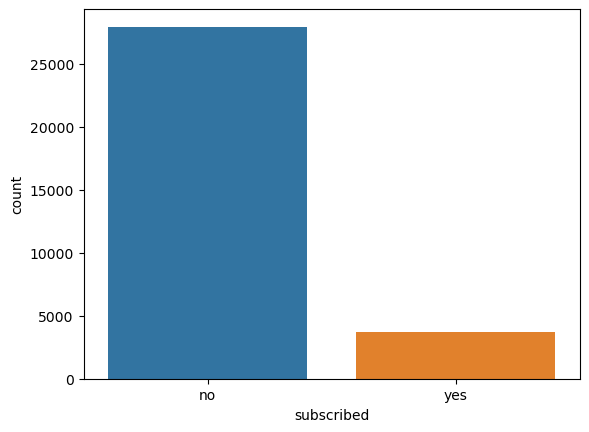

In [17]:
#Subscribed Clients
sns.countplot(x=df_train['subscribed'])

many has not subscribed yet

<Axes: xlabel='duration', ylabel='Count'>

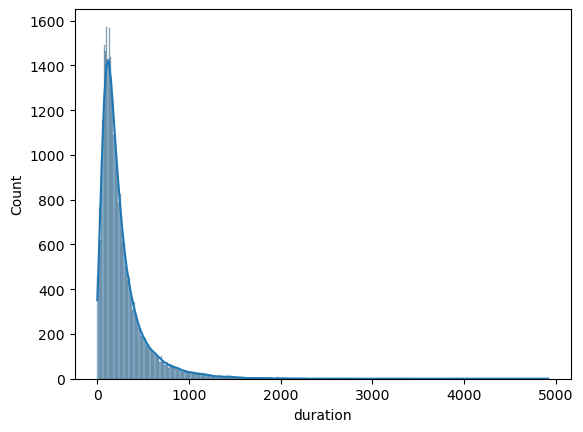

In [18]:
sns.histplot(x=df_train['duration'],kde=True)

<Axes: xlabel='campaign', ylabel='Count'>

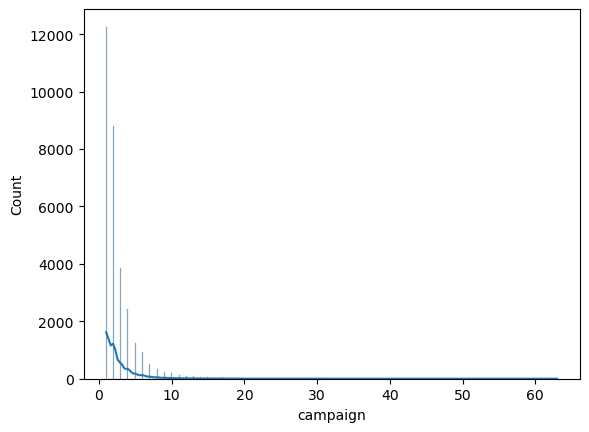

In [19]:
sns.histplot(x=df_train['campaign'],kde=True)

<Axes: xlabel='pdays', ylabel='Count'>

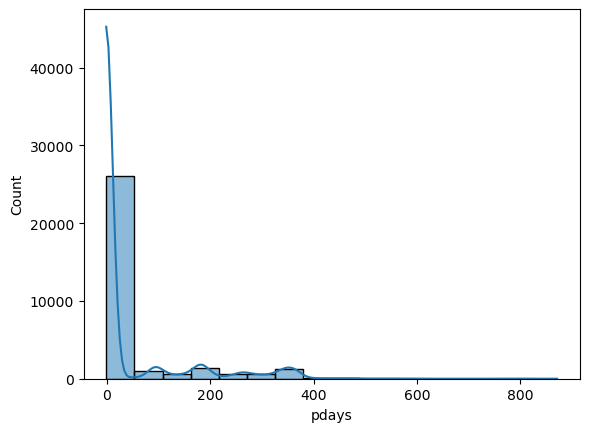

In [20]:
sns.histplot(x=df_train['pdays'],kde=True) 

<Axes: xlabel='previous', ylabel='Count'>

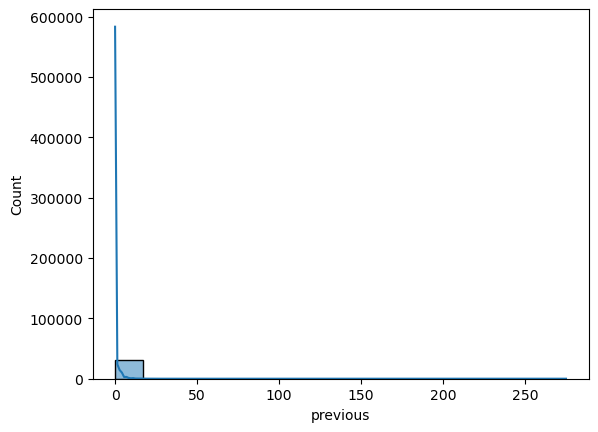

In [21]:
sns.histplot(x=df_train['previous'],kde=True)

Encoding object or Categorical column which means all the column will be in numeric

In [22]:
oe=OrdinalEncoder()
for i in df_train.columns:
    if df_train[i].dtypes=='object':
        df_train[i]=oe.fit_transform(df_train[i].values.reshape(-1,1))
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,19710,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,38556,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


lets see the correlation between the columns

In [23]:
corr_train=df_train.corr()
corr_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,0.061805,0.086454,0.096480,-0.051521,0.067897,-0.180047,-0.086140,-0.723830,-0.063399,-0.165274,0.007183,-0.103508,0.436148,0.254476,-0.443429,0.296663
age,0.013337,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,0.061805,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,0.086454,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,0.096480,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.051521,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.067897,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.180047,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.086140,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,-0.723830,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051


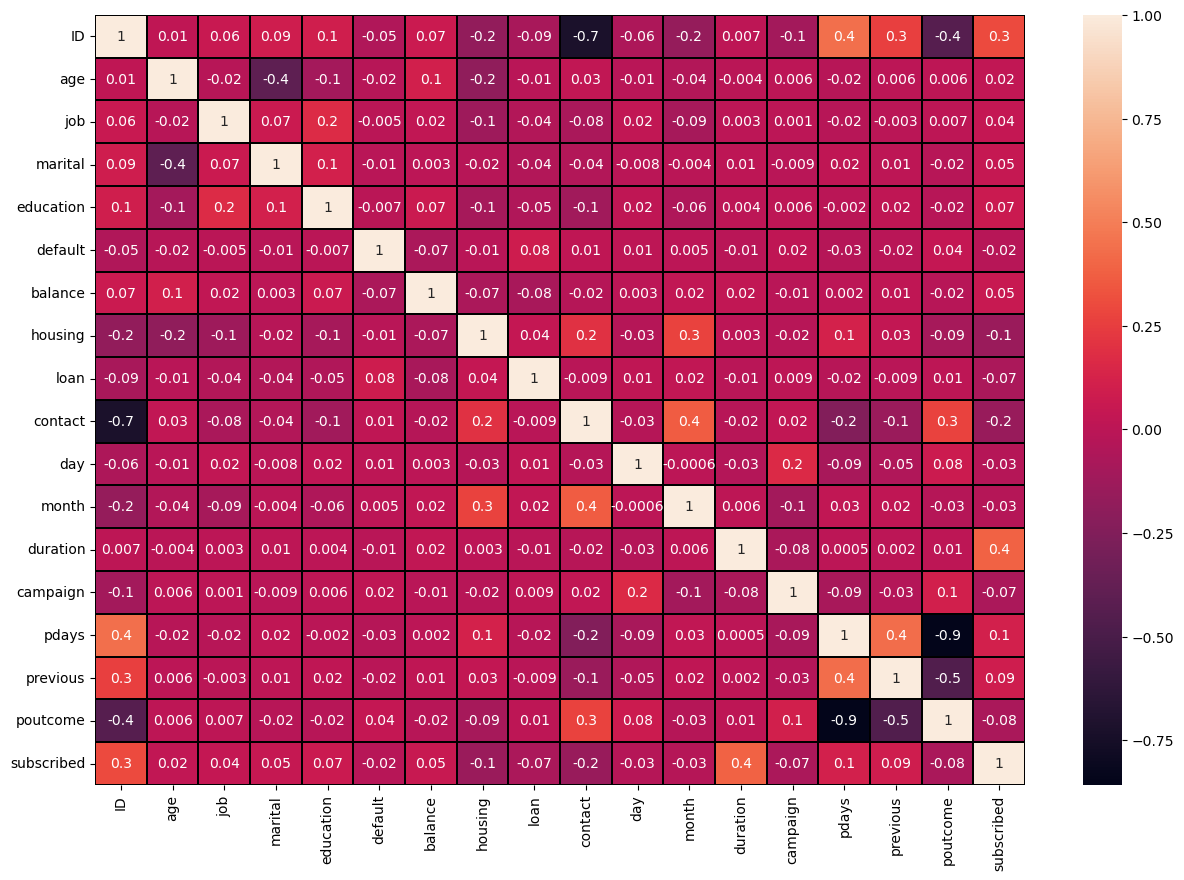

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), linewidths=0.1, fmt=".1g", linecolor='black', annot=True)
plt.show()

there is a strong negative at poutcome and pdays that is -0.9 

In [25]:
# Checking the correlation of the input variable with the subscribed
corr_train['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.389838
ID            0.296663
pdays         0.108290
previous      0.088081
education     0.066051
balance       0.050807
marital       0.046043
job           0.038921
age           0.024538
default      -0.020168
month        -0.028088
day          -0.029600
campaign     -0.070607
loan         -0.072266
poutcome     -0.080895
housing      -0.141092
contact      -0.150051
Name: subscribed, dtype: float64

1) The duration of the call is + correlated with subscribing the term deposite with 38.98%
2) Housing loan is having some relation -14.10% with subscription possibility
3) contact (Type of communication) is having some relation - with subscription possibility

In [26]:
#Checking the skewness for the data
df_train.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

The skewness is present in the numeric datas like age, balance, duration, pdays, previous. default, balance is having 7% and previous is 49

ID               Axes(0.125,0.653529;0.110714x0.226471)
age           Axes(0.257857,0.653529;0.110714x0.226471)
job           Axes(0.390714,0.653529;0.110714x0.226471)
marital       Axes(0.523571,0.653529;0.110714x0.226471)
education     Axes(0.656429,0.653529;0.110714x0.226471)
default       Axes(0.789286,0.653529;0.110714x0.226471)
balance          Axes(0.125,0.381765;0.110714x0.226471)
housing       Axes(0.257857,0.381765;0.110714x0.226471)
loan          Axes(0.390714,0.381765;0.110714x0.226471)
contact       Axes(0.523571,0.381765;0.110714x0.226471)
day           Axes(0.656429,0.381765;0.110714x0.226471)
month         Axes(0.789286,0.381765;0.110714x0.226471)
duration             Axes(0.125,0.11;0.110714x0.226471)
campaign          Axes(0.257857,0.11;0.110714x0.226471)
pdays             Axes(0.390714,0.11;0.110714x0.226471)
previous          Axes(0.523571,0.11;0.110714x0.226471)
poutcome          Axes(0.656429,0.11;0.110714x0.226471)
subscribed        Axes(0.789286,0.11;0.110714x0.

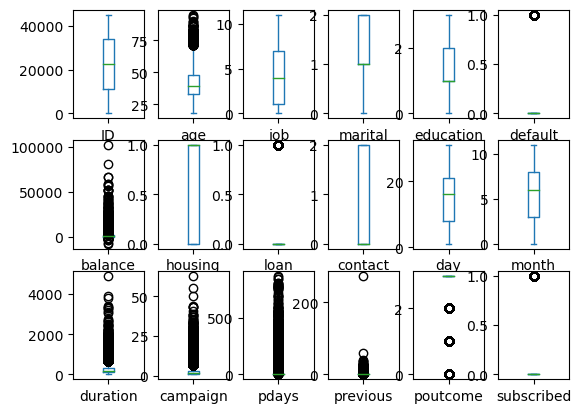

In [27]:
#detect the outliers 
df_train.plot(kind='box', subplots=True, layout=(3,6))

outliers are present in age, balance, duration, campaign, pdays, previous

Lets train our data

Train & test split - we are going to train the data with ml and evaluate the data with test

The train_test_split() method is used to split our data into training set and testing sets.

as we saw in heatmap from on that basis we can drop poutcome column to get rid off the multicollinearity because it is only 9 % (negatively) correlated with the target over pdays with positive 10%.

In [28]:
df_train=df_train.drop(['ID','poutcome'], axis=1)
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,1.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,0.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0


In [29]:
x=df_train.drop(['subscribed'],axis=1)
x.shape

(31647, 15)

In [30]:
y=df_train['subscribed']
y.shape

(31647,)

In [31]:
# removing outliers with zscore
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(31647, 15)

In [32]:
threshold=3
print(np.where(z>3))

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64), array([ 4, 12,  5, ..., 13, 14, 11], dtype=int64))


In [33]:
x_new=x[(z<3).all(axis=1)]
x.shape

(31647, 15)

In [34]:
y_new=y[(z<3).all(axis=1)]
y.shape

(31647,)

In [35]:
# calculating percentage data loss
loss=(31647-27584)/31647*100
loss

12.83849969981357

Removing Skewness

In [36]:
# Removing skewness data without outliers 
x_new=power_transform(x_new,method='yeo-johnson')
x_new

array([[ 1.41638695, -1.60682351, -0.28876993, ...,  0.17312134,
        -0.40609152, -0.40614368],
       [-0.97065514,  1.64175721, -0.28876993, ...,  0.17312134,
        -0.40609152, -0.40614368],
       [-1.52279707,  0.85225253, -0.28876993, ..., -1.10399933,
        -0.40609152, -0.40614368],
       ...,
       [-1.23751569,  0.09264005,  1.38481683, ...,  0.17312134,
        -0.40609152, -0.40614368],
       [ 1.19284141,  0.09264005, -1.9061241 , ...,  0.17312134,
        -0.40609152, -0.40614368],
       [-0.84341811,  0.09264005,  1.38481683, ...,  0.79924143,
        -0.40609152, -0.40614368]])

In [37]:
# checking again whether skewness is removed or not
sk=pd.DataFrame(x_new)
sk.skew()

0     0.000008
1    -0.147094
2    -0.047833
3    -0.039012
4     0.000000
5     0.529412
6    -0.207765
7     1.829242
8     0.584813
9    -0.165390
10   -0.376586
11    0.003741
12    0.205997
13    2.057313
14    2.056334
dtype: float64

the skewness has came down for specific columns which have earlier showed higher skewness

In [38]:
#scaling the data without outliers
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[ 1.41638695, -1.60682351, -0.28876993, ...,  0.17312134,
        -0.40609152, -0.40614368],
       [-0.97065514,  1.64175721, -0.28876993, ...,  0.17312134,
        -0.40609152, -0.40614368],
       [-1.52279707,  0.85225253, -0.28876993, ..., -1.10399933,
        -0.40609152, -0.40614368],
       ...,
       [-1.23751569,  0.09264005,  1.38481683, ...,  0.17312134,
        -0.40609152, -0.40614368],
       [ 1.19284141,  0.09264005, -1.9061241 , ...,  0.17312134,
        -0.40609152, -0.40614368],
       [-0.84341811,  0.09264005,  1.38481683, ...,  0.79924143,
        -0.40609152, -0.40614368]])

In [39]:
#scaling the data with outliers
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.41579295, -1.324317  , -0.27540549, ..., -0.24590574,
        -0.40855484, -0.23705869],
       [-0.93715562,  2.03772948, -0.27540549, ..., -0.24590574,
        -0.40855484, -0.23705869],
       [-1.31362739,  0.81516712, -0.27540549, ..., -0.56705872,
        -0.40855484, -0.23705869],
       ...,
       [-0.84303767, -0.10175464,  1.37156305, ...,  0.07524724,
        -0.40855484, -0.23705869],
       [ 1.5099109 ,  1.4264483 , -0.27540549, ...,  1.35985916,
         2.99472279,  4.71652095],
       [ 1.32167501, -0.10175464, -1.92237403, ..., -0.24590574,
        -0.40855484, -0.23705869]])

In [40]:
y_new.value_counts()

0.0    24762
1.0     2822
Name: subscribed, dtype: int64

In [41]:
# Balancing the data without outliers 
sm=SMOTE()
x_new,y_new=sm.fit_resample(x_new,y_new)
y_new.value_counts()

0.0    24762
1.0    24762
Name: subscribed, dtype: int64

In [42]:
y.value_counts()

0.0    27932
1.0     3715
Name: subscribed, dtype: int64

In [43]:
# Balancing the data without outliers
sm=SMOTE()
x,y=sm.fit_resample(x,y)
y.value_counts()

0.0    27932
1.0    27932
Name: subscribed, dtype: int64

Lets Model the data 

In [44]:
lr=LogisticRegression()

maxaccu=0
maxrs=0
for i in range(1,100):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20, random_state=i)
    lr.fit(xtrain,ytrain)
    predlr=lr.predict(xtest)
    acc=accuracy_score(ytest,predlr)
    print('testing accuracy', acc, 'randon state',i)
    print('training accuracy is ', accuracy_score(ytrain,(lr.predict(xtrain))))
    
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', maxrs)

testing accuracy 0.8103463707151168 randon state 1
training accuracy is  0.8087086885502673
max accuracy 0.8103463707151168 max_random_state 1
testing accuracy 0.8083773382260807 randon state 2
training accuracy is  0.8087310644201293
testing accuracy 0.8067663116441421 randon state 3
training accuracy is  0.8092904611666778
testing accuracy 0.808466839702855 randon state 4
training accuracy is  0.8098051061735025
testing accuracy 0.807482323458337 randon state 5
training accuracy is  0.8093799646461256
testing accuracy 0.8097198603776963 randon state 6
training accuracy is  0.8089995748584726
testing accuracy 0.8072138190280139 randon state 7
training accuracy is  0.8087758161598532
testing accuracy 0.8077508278886602 randon state 8
training accuracy is  0.8089995748584726
testing accuracy 0.8053342880157522 randon state 9
training accuracy is  0.809245709426954
testing accuracy 0.8076613264118858 randon state 10
training accuracy is  0.8089995748584726
testing accuracy 0.805871296876

testing accuracy 0.8105253736686655 randon state 89
training accuracy is  0.8087981920297151
testing accuracy 0.8051552850622036 randon state 90
training accuracy is  0.8095589716050211
testing accuracy 0.8053342880157522 randon state 91
training accuracy is  0.8096037233447451
testing accuracy 0.8059607983531728 randon state 92
training accuracy is  0.8096037233447451
testing accuracy 0.8126734091112503 randon state 93
training accuracy is  0.8077912778859279
testing accuracy 0.8141054327396402 randon state 94
training accuracy is  0.808082164194133
testing accuracy 0.8078403293654345 randon state 95
training accuracy is  0.8089100713790248
testing accuracy 0.80918285151705 randon state 96
training accuracy is  0.8087310644201293
testing accuracy 0.8068558131209165 randon state 97
training accuracy is  0.8096708509543309
testing accuracy 0.8031862525731674 randon state 98
training accuracy is  0.8099169855228122
testing accuracy 0.8036337599570393 randon state 99
training accuracy is 

In [45]:
print('max accuracy', maxaccu , 'max_random_state', maxrs)

max accuracy 0.8176854918106149 max_random_state 79


In [46]:
# For without outliers
# Finding the random state
maxaccu=0
maxrs=0
for i in range(1,100):
    xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.20, random_state=i)
    lr.fit(xtrain,ytrain)
    predlr=lr.predict(xtest)
    acc=accuracy_score(ytest,predlr)
    print('testing accuracy', acc, 'randon state',i)
    print('training accuracy is ', accuracy_score(ytrain,(lr.predict(xtrain))))
    
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', maxrs)

testing accuracy 0.81665825340737 randon state 1
training accuracy is  0.8118579469446477
max accuracy 0.81665825340737 max_random_state 1
testing accuracy 0.8087834427057042 randon state 2
training accuracy is  0.8134228526716979
testing accuracy 0.8085815244825846 randon state 3
training accuracy is  0.8137762184810319
testing accuracy 0.8077738515901061 randon state 4
training accuracy is  0.813902420555794
testing accuracy 0.8107016658253408 randon state 5
training accuracy is  0.8134985739165552
testing accuracy 0.8065623422513882 randon state 6
training accuracy is  0.813902420555794
testing accuracy 0.8118122160524988 randon state 7
training accuracy is  0.8127666018829349
testing accuracy 0.8147400302877335 randon state 8
training accuracy is  0.8120851106792195
testing accuracy 0.812216052498738 randon state 9
training accuracy is  0.8126656402231253
testing accuracy 0.8148409893992933 randon state 10
training accuracy is  0.8117822256997905
testing accuracy 0.812216052498738 

testing accuracy 0.8213023725391216 randon state 87
training accuracy is  0.8103687624624549
testing accuracy 0.81665825340737 randon state 88
training accuracy is  0.811454100305409
testing accuracy 0.8138313982836951 randon state 89
training accuracy is  0.8121608319240768
testing accuracy 0.8148409893992933 randon state 90
training accuracy is  0.8120598702642672
testing accuracy 0.8138313982836951 randon state 91
training accuracy is  0.8123122744137914
testing accuracy 0.8065623422513882 randon state 92
training accuracy is  0.813902420555794
testing accuracy 0.8142352347299344 randon state 93
training accuracy is  0.8124637169035059
testing accuracy 0.8117112569409389 randon state 94
training accuracy is  0.8128675635427447
testing accuracy 0.8129227662796568 randon state 95
training accuracy is  0.8125646785633156
testing accuracy 0.8117112569409389 randon state 96
training accuracy is  0.8131199676922689
testing accuracy 0.8140333165068148 randon state 97
training accuracy is  

In [47]:
print('max accuracy', maxaccu , 'max_random_state', maxrs)

max accuracy 0.822816759212519 max_random_state 62


so here we can see the accuracy for with and without considering outliers are nearly same, so lets consider without outlier case

the max accuracy is 82.16 with logistic regression at random state 17

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.2,random_state=17)

In [49]:
x_train.shape

(39619, 15)

In [50]:
x_test.shape

(9905, 15)

In [51]:
y_train.shape

(39619,)

In [52]:
y_test.shape

(9905,)

In [53]:
# Checking score again for the the lr model 
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.score(x_train,y_train)
y_pred=lin_reg.predict(x_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n',y_test)

Predicted result price:
 [ 0.7280748  -0.00416872  1.01049069 ...  0.74118552  0.68936595
  0.64882576]


actual price
 46612    1.0
20718    0.0
35307    1.0
29016    1.0
17156    0.0
        ... 
28882    1.0
34167    1.0
35973    1.0
31587    1.0
17107    0.0
Name: subscribed, Length: 9905, dtype: float64


In [54]:
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.4999495204442201
[[2338 2608]
 [2345 2614]]
              precision    recall  f1-score   support

         0.0       0.50      0.47      0.49      4946
         1.0       0.50      0.53      0.51      4959

    accuracy                           0.50      9905
   macro avg       0.50      0.50      0.50      9905
weighted avg       0.50      0.50      0.50      9905



In [55]:
#DecisionTreeClassifier
dec = DecisionTreeClassifier()
dec.fit(x_train,y_train)
y_pred_dec = dec.predict(x_test)
as_dtc = accuracy_score(y_test,y_pred_dec)
print("Accuracy Score:",as_dtc)

Accuracy Score: 0.9154972236244321


In [56]:
print(accuracy_score(y_test,y_pred_dec))
print(confusion_matrix(y_test,y_pred_dec))
print(classification_report(y_test,y_pred_dec))

0.9154972236244321
[[4456  490]
 [ 347 4612]]
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      4946
         1.0       0.90      0.93      0.92      4959

    accuracy                           0.92      9905
   macro avg       0.92      0.92      0.92      9905
weighted avg       0.92      0.92      0.92      9905



In [57]:
# RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
predtrain=rf.predict(x_train)
print("Training accuracy is ",accuracy_score(y_train,predtrain))
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Training accuracy is  1.0
0.9545683997980817
[[4621  325]
 [ 125 4834]]
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      4946
         1.0       0.94      0.97      0.96      4959

    accuracy                           0.95      9905
   macro avg       0.96      0.95      0.95      9905
weighted avg       0.96      0.95      0.95      9905



In [58]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
xgb=GradientBoostingClassifier()
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(accuracy_score(y_test,predxgb))
print(confusion_matrix(y_test,predxgb))
print(classification_report(y_test,predxgb))

0.9190307925290258
[[4410  536]
 [ 266 4693]]
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92      4946
         1.0       0.90      0.95      0.92      4959

    accuracy                           0.92      9905
   macro avg       0.92      0.92      0.92      9905
weighted avg       0.92      0.92      0.92      9905



AUC ROC curve

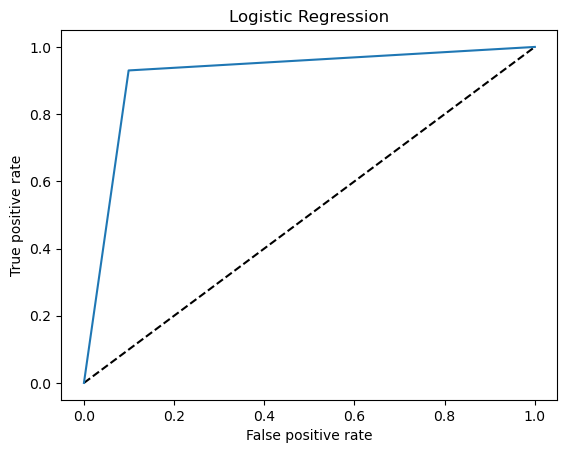

0.9154781297215411

In [59]:
y_pred_prob=dec.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DessitionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(y_test,dec.predict(x_test))

auc_score

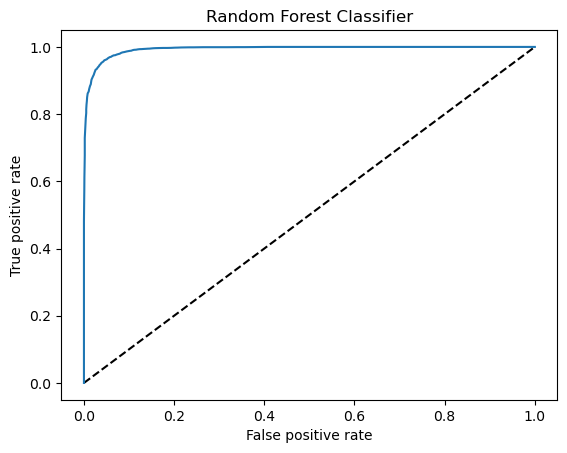

0.9545418203632912

In [60]:
#AUC ROC curve for Random Forest Classifier Classifier
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(y_test,rf.predict(x_test))

auc_score

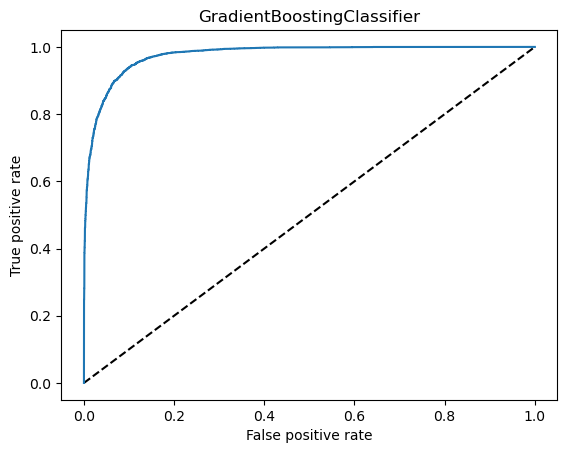

0.9189948764666056

In [61]:
#AUC ROC curve for  GradientBoostingClassifier
y_pred_prob=xgb.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(y_test,xgb.predict(x_test))

auc_score

Random Forest Classifier is giving accuracy of 95.32%

Cross validation

because rf has high accuracy lets do more analysis on rf

In [62]:
scr=cross_val_score(rf,x_new,y_new,cv=3)
scr

array([0.93003392, 0.95674824, 0.95771747])

In [63]:
print("The Cross Validation Score of Random Forest Classifier Model is: ",scr.mean())

The Cross Validation Score of Random Forest Classifier Model is:  0.9481665455132865


Lets find the parameter

In [64]:
# with RidgeClassifierCV
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_new, y_new)
clf.score(x_new, y_new)

0.8122728374121638

In [65]:
parameters={'max_features':['auto'] , 
            'max_depth':[10,20],
            'criterion':['gini','entropy'], 
            'n_estimators': [100,200],
            'n_jobs':[-1]}

In [66]:
#Creating parameter list to be passed in GridSearchCV
grid_search = GridSearchCV(estimator=rf,   #RandomForestClassifier(),
                           param_grid=parameters)

In [67]:
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=20, max_features='auto', n_jobs=-1)


In [68]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': -1}

In [69]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features='auto', n_jobs=-1)

In [70]:
# Checking score with best parameter
model=RandomForestClassifier(max_depth=20, max_features='auto', n_estimators=200,
                       n_jobs=-1,criterion='gini')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Final Accuracy is with RandomForestClassifier = ',accuracy_score(y_test,pred))

Final Accuracy is with RandomForestClassifier =  0.9486118122160525


Saving the model

In [92]:
import joblib
joblib.dump(grid_search.best_estimator_, "TermDeposite.pkl")

['TermDeposite.pkl']

Now lets treat Test Model

In [93]:
df_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [94]:
df_test.shape

(13564, 17)

In [95]:
df_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [96]:
# Checking for null values
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are no null values

In [97]:
df_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


Countplot for  job
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


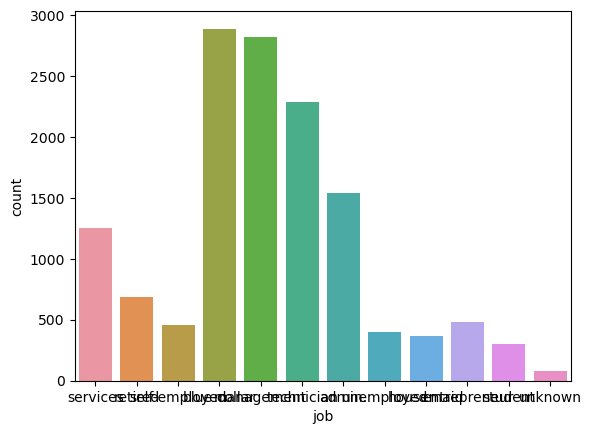

Countplot for  marital
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


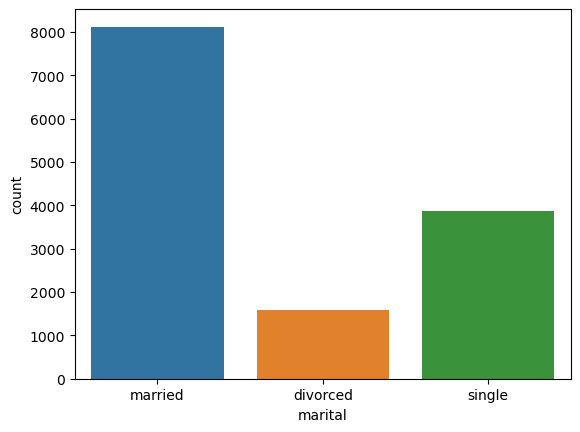

Countplot for  education
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


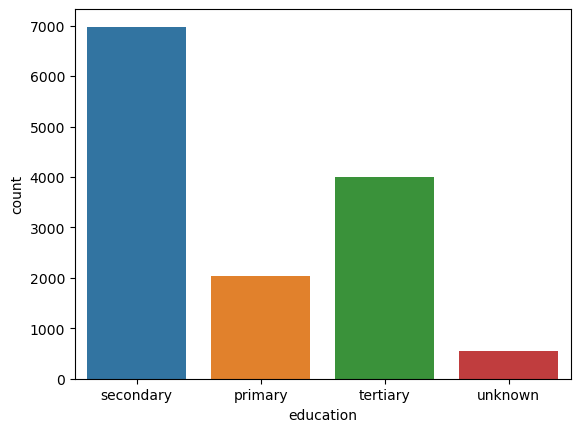

Countplot for  default
no     13334
yes      230
Name: default, dtype: int64


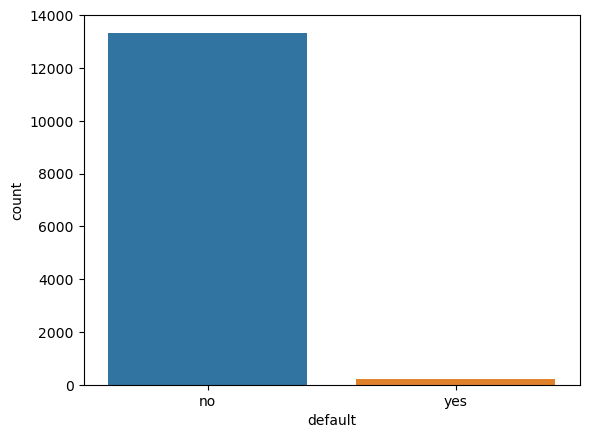

Countplot for  housing
yes    7546
no     6018
Name: housing, dtype: int64


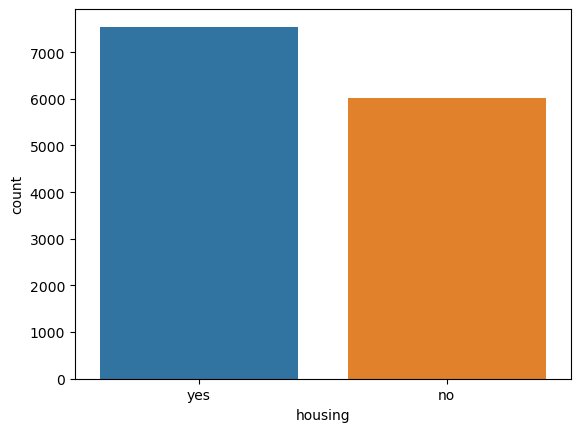

Countplot for  loan
no     11451
yes     2113
Name: loan, dtype: int64


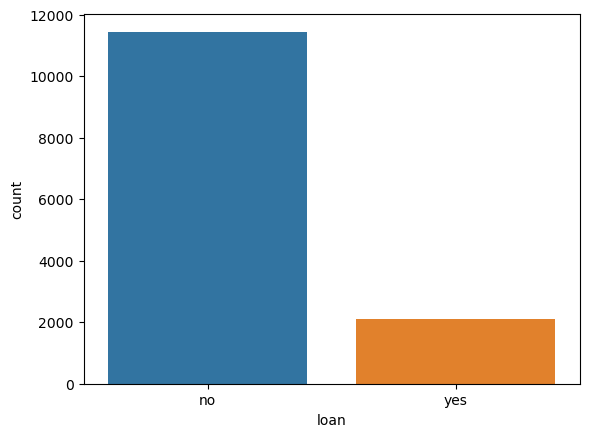

Countplot for  contact
cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64


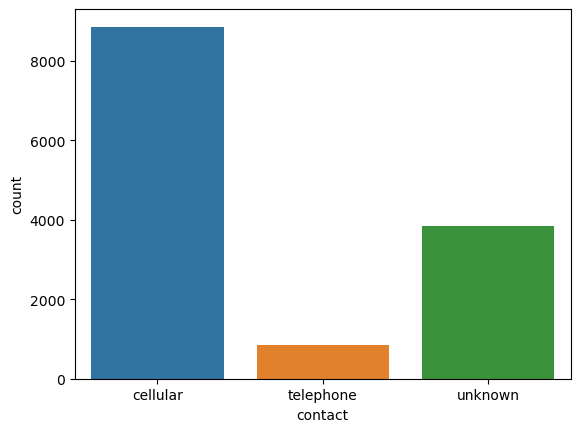

Countplot for  month
may    4097
jul    2051
aug    1914
jun    1603
nov    1187
apr     877
feb     822
jan     426
oct     226
sep     169
mar     135
dec      57
Name: month, dtype: int64


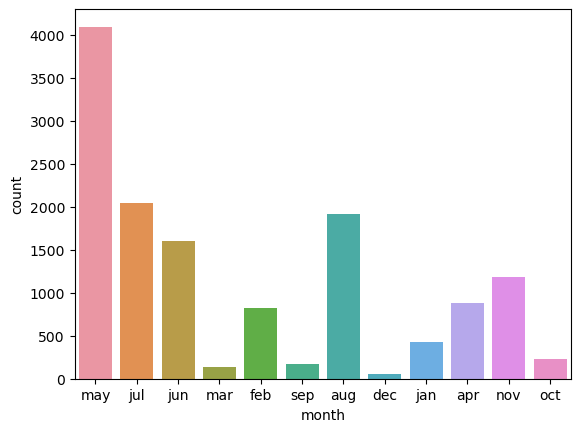

Countplot for  poutcome
unknown    11030
failure     1539
other        552
success      443
Name: poutcome, dtype: int64


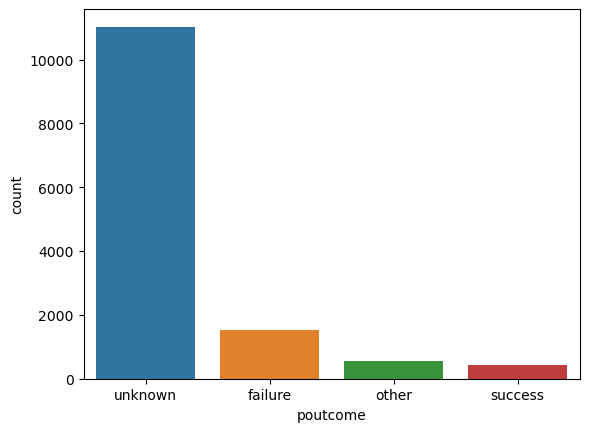

In [98]:
# Plotting Count plot for categorical data
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        print("Countplot for ", i)
        sns.countplot(x=df_test[i])
        print(df_test[i].value_counts().sort_values(ascending=False))
        plt.show()

Countplot for  ID


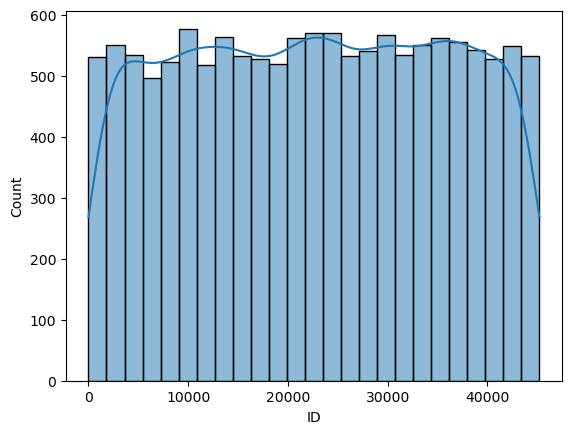

Countplot for  age


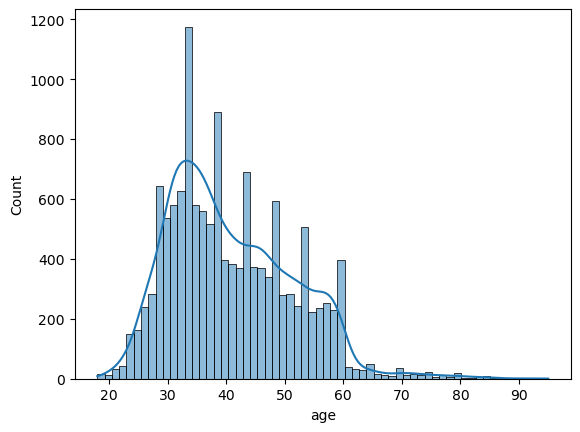

Countplot for  balance


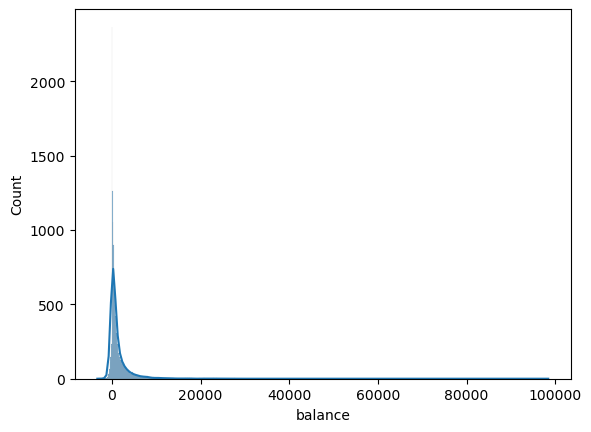

Countplot for  day


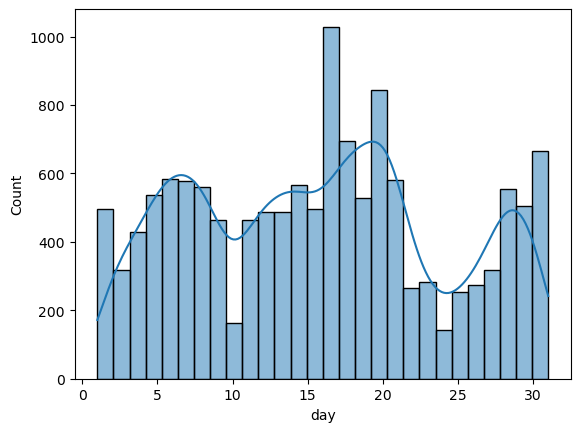

Countplot for  duration


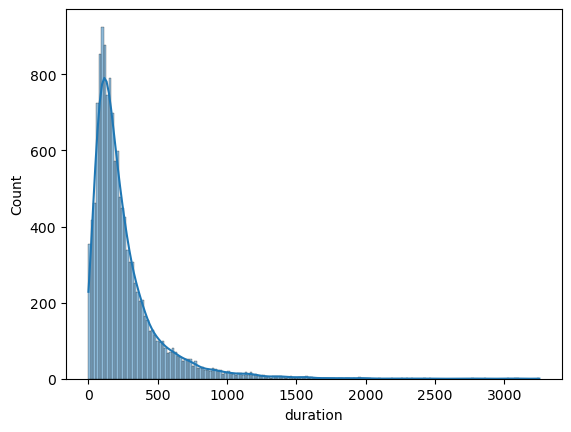

Countplot for  campaign


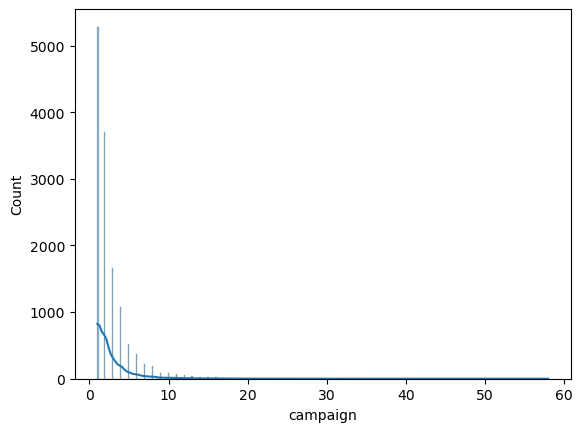

Countplot for  pdays


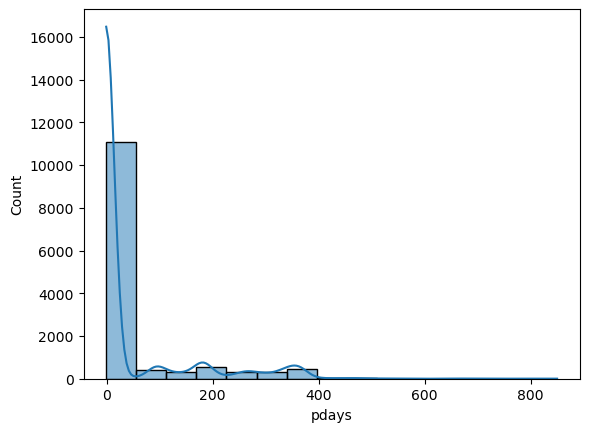

Countplot for  previous


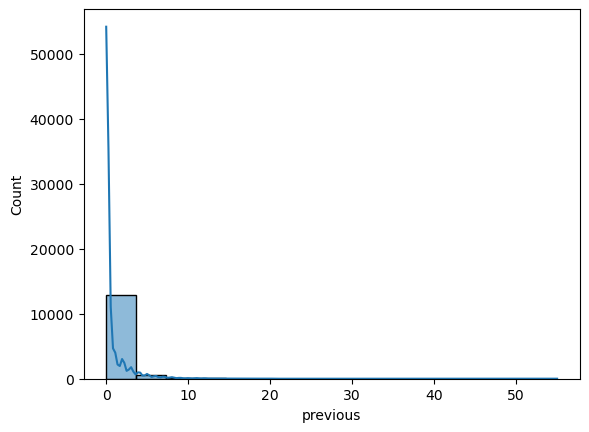

In [99]:
# Plotting Count plot for categorical data
for i in df_test.columns:
    if df_test[i].dtypes!='object':
        print("Countplot for ", i)
        sns.histplot(x=df_test[i],kde=True)
        plt.show()

In [100]:
#lets convert the columns to numeric
le=LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=le.fit_transform(df_test[i].values.reshape(-1,1))
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [101]:
#Correlation Matrics
corr_test=df_test.corr()
corr_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,1.000000,0.018874,0.065762,0.070859,0.090366,-0.056901,0.086916,-0.166996,-0.079589,-0.718882,-0.056813,-0.154451,0.026686,-0.101389,0.441437,0.321845,-0.449871
age,0.018874,1.000000,-0.024413,-0.396771,-0.117274,-0.022243,0.085246,-0.189573,-0.022863,0.024945,-0.004622,-0.051712,-0.006456,0.002439,-0.027797,-0.011326,0.009334
job,0.065762,-0.024413,1.000000,0.052579,0.158185,-0.010780,0.012731,-0.125409,-0.018603,-0.090929,0.027381,-0.100924,0.009494,0.019584,-0.028884,0.005024,0.020020
marital,0.070859,-0.396771,0.052579,1.000000,0.110982,-0.000793,-0.000986,-0.012039,-0.059223,-0.036893,0.000419,-0.014271,0.012563,-0.008048,0.017854,0.021518,-0.010196
education,0.090366,-0.117274,0.158185,0.110982,1.000000,-0.020382,0.063001,-0.080032,-0.054845,-0.108417,0.033917,-0.060441,-0.002513,0.006523,0.003763,0.024317,-0.020194
default,-0.056901,-0.022243,-0.010780,-0.000793,-0.020382,1.000000,-0.060447,0.008097,0.066402,0.018585,0.007931,0.027885,-0.008022,0.012558,-0.030713,-0.025641,0.034386
balance,0.086916,0.085246,0.012731,-0.000986,0.063001,-0.060447,1.000000,-0.071759,-0.086091,-0.034654,0.006890,0.012272,0.015375,-0.020524,0.007136,0.024824,-0.023993
housing,-0.166996,-0.189573,-0.125409,-0.012039,-0.080032,0.008097,-0.071759,1.000000,0.053394,0.171775,-0.033407,0.271594,0.009843,-0.029587,0.136453,0.045626,-0.116616
loan,-0.079589,-0.022863,-0.018603,-0.059223,-0.054845,0.066402,-0.086091,0.053394,1.000000,-0.015035,0.003121,0.017189,-0.011538,0.011501,-0.028705,-0.016183,0.025735
contact,-0.718882,0.024945,-0.090929,-0.036893,-0.108417,0.018585,-0.034654,0.171775,-0.015035,1.000000,-0.030176,0.356889,-0.030957,0.012308,-0.244138,-0.168726,0.272425


<Axes: >

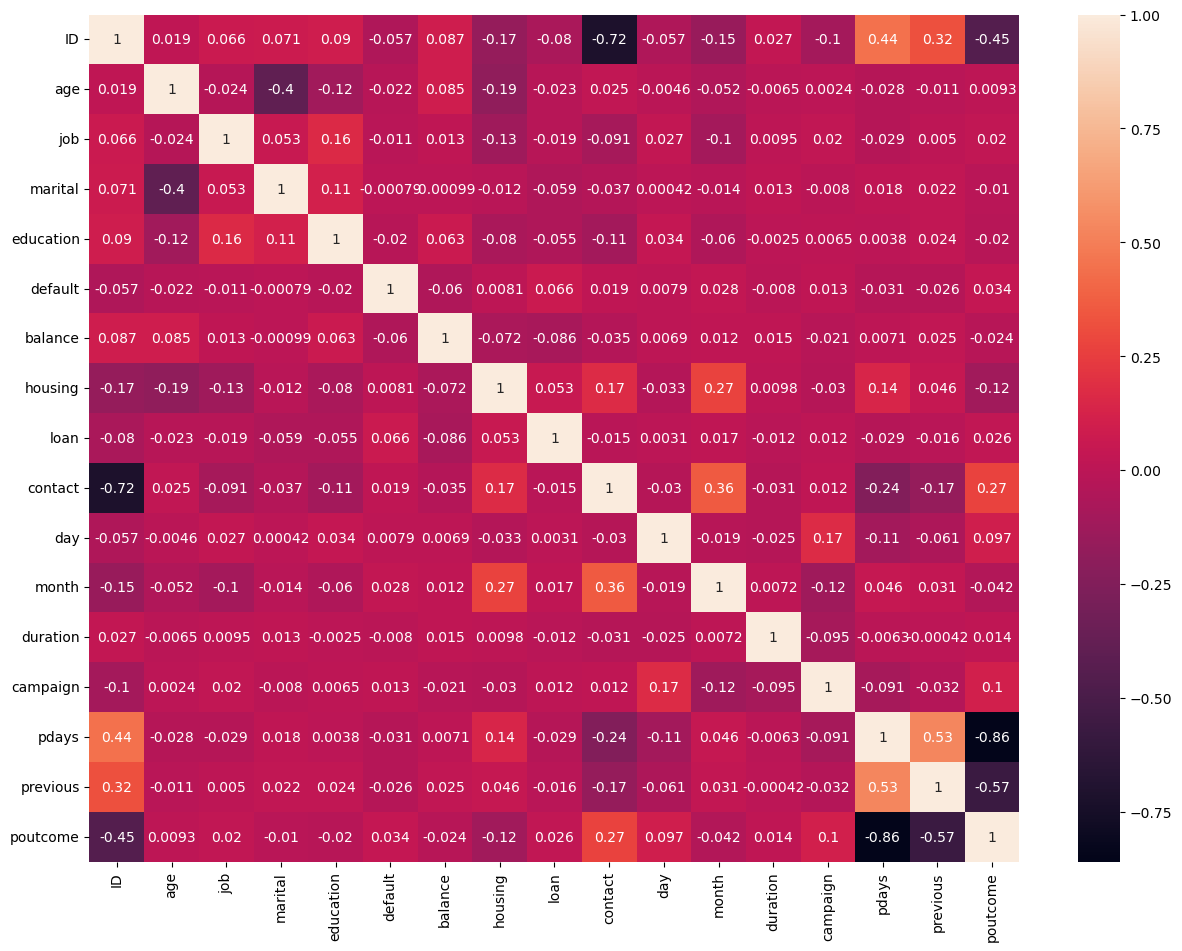

In [102]:
# Plotting the heatmap
plt.figure(figsize=(15,11))
sns.heatmap(corr_test,annot=True)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

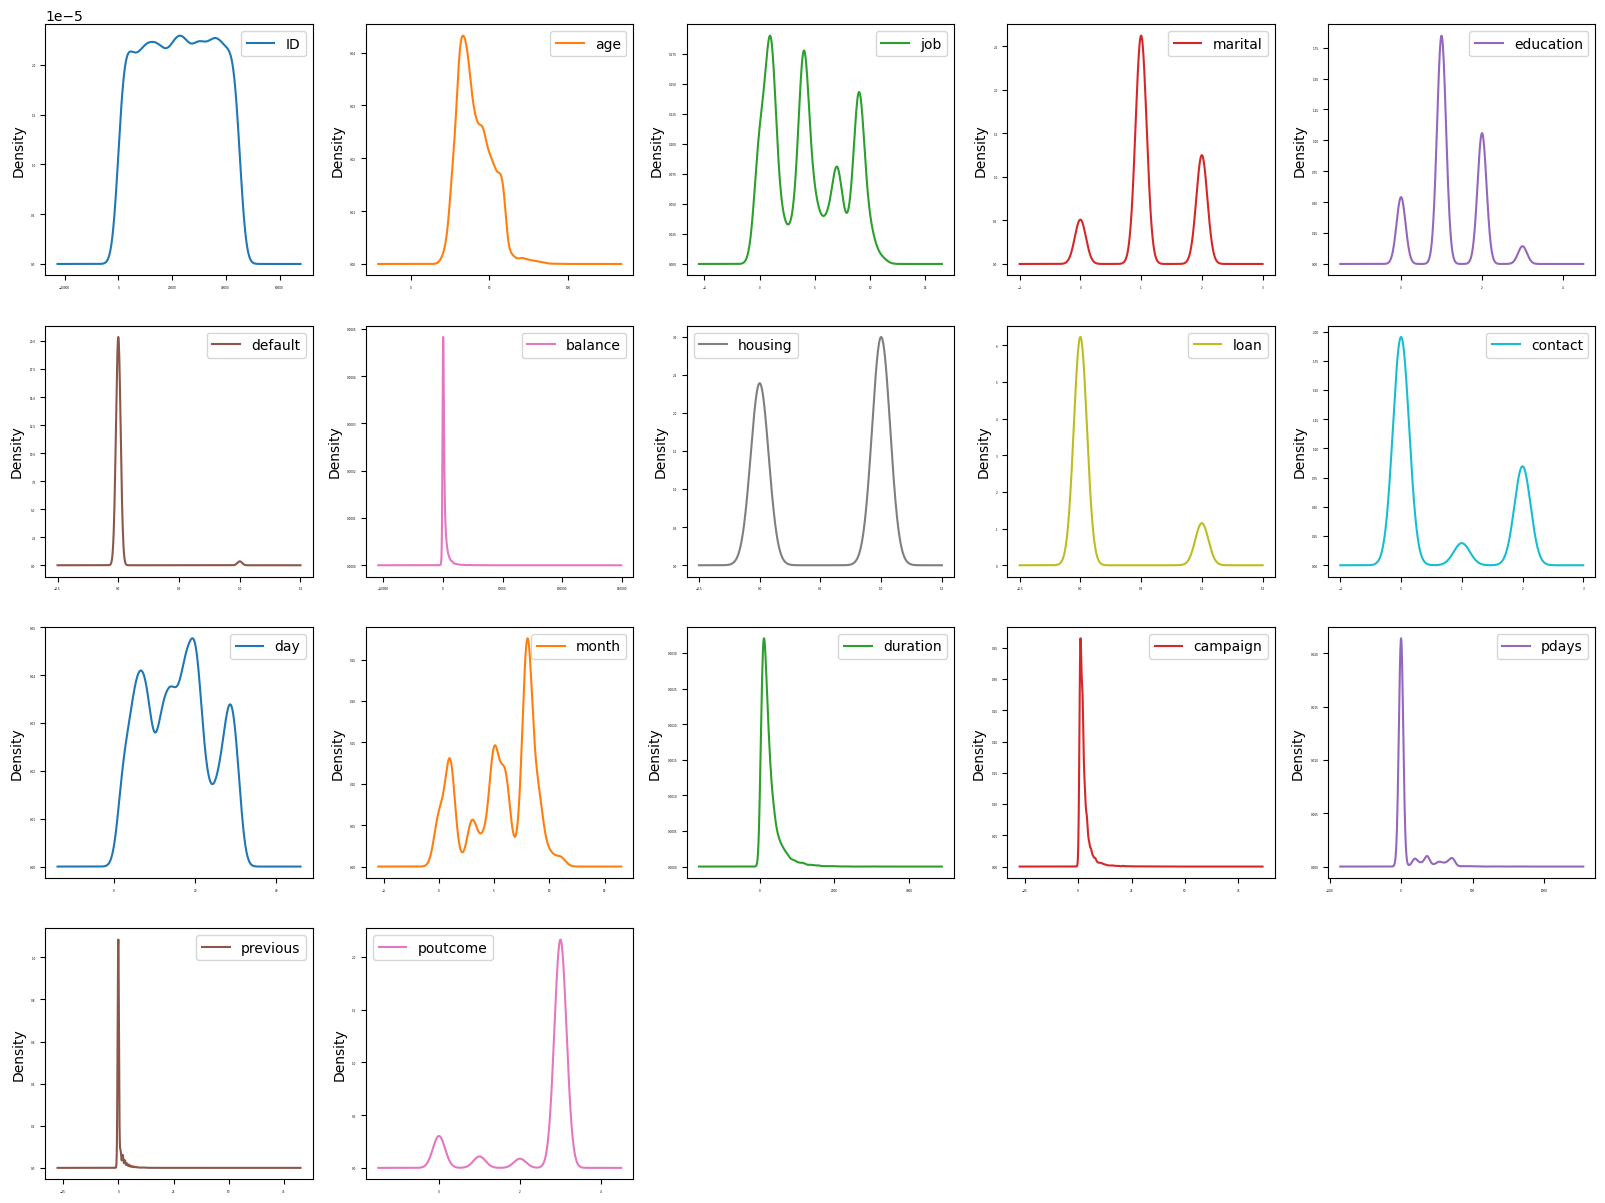

In [103]:
#checking Skewness
df_test.plot(kind='density', subplots=True, layout=(4,5), sharex=False, legend=True, fontsize=2,figsize=(20,15))

In [104]:
#Checking the skewness for the data
df_test.skew()

ID          -0.013625
age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

ID              Axes(0.125,0.653529;0.110714x0.226471)
age          Axes(0.257857,0.653529;0.110714x0.226471)
job          Axes(0.390714,0.653529;0.110714x0.226471)
marital      Axes(0.523571,0.653529;0.110714x0.226471)
education    Axes(0.656429,0.653529;0.110714x0.226471)
default      Axes(0.789286,0.653529;0.110714x0.226471)
balance         Axes(0.125,0.381765;0.110714x0.226471)
housing      Axes(0.257857,0.381765;0.110714x0.226471)
loan         Axes(0.390714,0.381765;0.110714x0.226471)
contact      Axes(0.523571,0.381765;0.110714x0.226471)
day          Axes(0.656429,0.381765;0.110714x0.226471)
month        Axes(0.789286,0.381765;0.110714x0.226471)
duration            Axes(0.125,0.11;0.110714x0.226471)
campaign         Axes(0.257857,0.11;0.110714x0.226471)
pdays            Axes(0.390714,0.11;0.110714x0.226471)
previous         Axes(0.523571,0.11;0.110714x0.226471)
poutcome         Axes(0.656429,0.11;0.110714x0.226471)
dtype: object

<Figure size 1200x700 with 0 Axes>

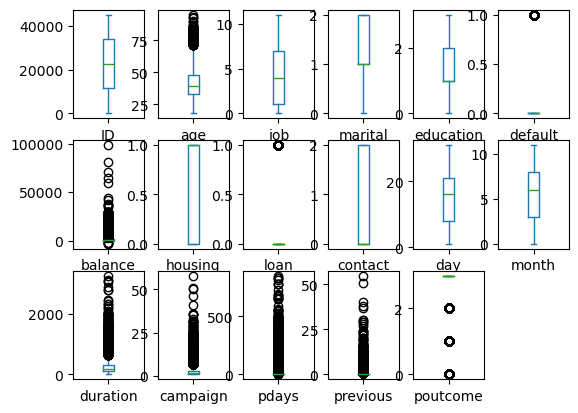

In [105]:
# Detecting the outliers by box plot
# Taking Box plot
plt.figure(figsize=(12,7))
df_test.plot(kind='box', subplots=True, layout=(3,6))

outeriers are present in age, balance, duration, capaign, pdays and previous

In [106]:
# Dropping the columns as discussed
df_test=df_test.drop(['ID','poutcome'], axis=1)
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3


In [107]:
X=df_test
X.shape

(13564, 15)

In [108]:
# removing outliers with zscore
Z=np.abs(zscore(X))
Z.shape

(13564, 15)

In [109]:
threshold=3
print(np.where(z>3))

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64), array([ 4, 12,  5, ..., 13, 14, 11], dtype=int64))


In [110]:
X=X[(Z<3).all(axis=1)]
X.shape

(11821, 15)

In [111]:
#Data Loss
loss=(13564-11821)/13564*100
loss

12.850191683869063

Data Loss of 12.85% is comapatively lesser than the total datapoints hence removing the outliers

In [112]:
#library to use PowerTransform
X=power_transform(X,method='yeo-johnson')
X

array([[-0.84405458,  0.84679099, -0.28389619, ...,  1.59336422,
        -0.41677932, -0.41683557],
       [-0.97053523,  0.61383257,  1.38112756, ..., -1.10180485,
        -0.41677932, -0.41683557],
       [ 1.4825457 ,  0.84679099,  1.38112756, ...,  0.17519288,
        -0.41677932, -0.41683557],
       ...,
       [ 1.26273117, -1.02250693, -0.28389619, ..., -1.10180485,
        -0.41677932, -0.41683557],
       [-0.48614795,  0.3612071 , -0.28389619, ..., -1.10180485,
        -0.41677932, -0.41683557],
       [-1.23564934, -1.61031766,  1.38112756, ...,  0.17519288,
         2.39294331,  2.4177608 ]])

In [113]:
#scaling the data with outliers
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.84405458,  0.84679099, -0.28389619, ...,  1.59336422,
        -0.41677932, -0.41683557],
       [-0.97053523,  0.61383257,  1.38112756, ..., -1.10180485,
        -0.41677932, -0.41683557],
       [ 1.4825457 ,  0.84679099,  1.38112756, ...,  0.17519288,
        -0.41677932, -0.41683557],
       ...,
       [ 1.26273117, -1.02250693, -0.28389619, ..., -1.10180485,
        -0.41677932, -0.41683557],
       [-0.48614795,  0.3612071 , -0.28389619, ..., -1.10180485,
        -0.41677932, -0.41683557],
       [-1.23564934, -1.61031766,  1.38112756, ...,  0.17519288,
         2.39294331,  2.4177608 ]])

looks like we have treated the test data. Now lets compare.

In [114]:
Loaded_Model=joblib.load("TermDeposite.pkl")

In [115]:
# predicting the data
data_pred=Loaded_Model.predict(X)
data_pred

array([0., 1., 0., ..., 0., 0., 1.])

In [116]:
input_data=pd.DataFrame(X)

In [117]:
output_data=pd.DataFrame(data_pred)

In [118]:
result = pd.concat([input_data, output_data], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,0
0,-0.844055,0.846791,-0.283896,-0.256727,0.0,-0.477857,0.898760,-0.431155,-0.742530,0.002703,0.854101,-2.125562,1.593364,-0.416779,-0.416836,0.0
1,-0.970535,0.613833,1.381128,1.039935,0.0,-0.458489,0.898760,-0.431155,1.396731,0.119516,0.854101,1.803035,-1.101805,-0.416779,-0.416836,1.0
2,1.482546,0.846791,1.381128,-1.744795,0.0,1.465742,0.898760,-0.431155,1.025885,-0.238039,0.854101,-1.126302,0.175193,-0.416779,-0.416836,0.0
3,0.524223,-1.022507,-1.889830,-0.256727,0.0,-2.854861,-1.112645,2.319350,1.396731,-1.683575,-0.190224,-0.578727,-1.101805,-0.416779,-0.416836,0.0
4,-0.844055,0.083486,1.381128,1.039935,0.0,-0.580630,0.898760,-0.431155,-0.742530,0.780499,-0.190224,1.201554,0.175193,-0.416779,-0.416836,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11816,-0.844055,1.267607,1.381128,-0.256727,0.0,-0.469597,0.898760,-0.431155,-0.742530,-1.037655,0.854101,0.178481,-1.101805,-0.416779,-0.416836,0.0
11817,-0.052243,0.083486,-0.283896,1.039935,0.0,-0.536227,-1.112645,-0.431155,-0.742530,1.389088,-1.469098,-0.257349,1.174309,-0.416779,-0.416836,0.0
11818,1.262731,-1.022507,-0.283896,-1.744795,0.0,0.744849,0.898760,-0.431155,1.396731,0.566935,0.151761,-0.181529,-1.101805,-0.416779,-0.416836,0.0
11819,-0.486148,0.361207,-0.283896,-1.744795,0.0,-0.360132,0.898760,-0.431155,-0.742530,1.486509,-0.524929,-0.353858,-1.101805,-0.416779,-0.416836,0.0


In [124]:
result.columns = [*result.columns[:-1], 15]
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.844055,0.846791,-0.283896,-0.256727,0.0,-0.477857,0.898760,-0.431155,-0.742530,0.002703,0.854101,-2.125562,1.593364,-0.416779,-0.416836,0.0
1,-0.970535,0.613833,1.381128,1.039935,0.0,-0.458489,0.898760,-0.431155,1.396731,0.119516,0.854101,1.803035,-1.101805,-0.416779,-0.416836,1.0
2,1.482546,0.846791,1.381128,-1.744795,0.0,1.465742,0.898760,-0.431155,1.025885,-0.238039,0.854101,-1.126302,0.175193,-0.416779,-0.416836,0.0
3,0.524223,-1.022507,-1.889830,-0.256727,0.0,-2.854861,-1.112645,2.319350,1.396731,-1.683575,-0.190224,-0.578727,-1.101805,-0.416779,-0.416836,0.0
4,-0.844055,0.083486,1.381128,1.039935,0.0,-0.580630,0.898760,-0.431155,-0.742530,0.780499,-0.190224,1.201554,0.175193,-0.416779,-0.416836,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11816,-0.844055,1.267607,1.381128,-0.256727,0.0,-0.469597,0.898760,-0.431155,-0.742530,-1.037655,0.854101,0.178481,-1.101805,-0.416779,-0.416836,0.0
11817,-0.052243,0.083486,-0.283896,1.039935,0.0,-0.536227,-1.112645,-0.431155,-0.742530,1.389088,-1.469098,-0.257349,1.174309,-0.416779,-0.416836,0.0
11818,1.262731,-1.022507,-0.283896,-1.744795,0.0,0.744849,0.898760,-0.431155,1.396731,0.566935,0.151761,-0.181529,-1.101805,-0.416779,-0.416836,0.0
11819,-0.486148,0.361207,-0.283896,-1.744795,0.0,-0.360132,0.898760,-0.431155,-0.742530,1.486509,-0.524929,-0.353858,-1.101805,-0.416779,-0.416836,0.0


The Last column is the Subscription whether or not customer subscribe it or not '0' represents customer Not Subscribed '1' represents customer Subscribed

In [125]:
result[15]

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
11816    0.0
11817    0.0
11818    0.0
11819    0.0
11820    1.0
Name: 15, Length: 11821, dtype: float64

In [126]:
result[15].value_counts()

0.0    8824
1.0    2997
Name: 15, dtype: int64

So there are 2997 clients who have subscribed and 8824 clients who have not subscribed